<h1><center>Social Data Science - Project</center></h1>
<h2><center>Road Accidents in Great Britain</center></h2>

By **Janus, Gautam and Mathias**

## Import Package

In [5]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import preprocessing, cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


## Import data:
Our data is available at [Great Britian Road Accident Data](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) in which we take the need URLs for each CSV file. 

However, we were unable to unpack a ZIP file containing multiple files for the periode 2005 to 2014. Hence, The needed files are store on our desktop and imported into python.

In [6]:
class Vehicles:
    """ 
    Since we import 2 different files - 2016,2015 and have to do same operations on all of them.
    This class is used which has an Instance method used for removing unnecessary columns or values from 
    dataframe and calls init method to initialize the name and link  
    """
    def __init__(self, link):
        self.name = ''.join(re.findall("[_].+[A-Za-z].+\d",link))
        self.link = link
    
    def load_clean(self):
        self.name = pd.read_csv(self.link,compression='zip')
        self.name = self.name[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
        
        # Removing Sex_of_Driver = -1 & 3 which means data missing and Not known
        self.name = self.name[(self.name['Sex_of_Driver']==1) | (self.name['Sex_of_Driver']==2)]
        
        # Removing missing data values from Age_of_Driver
        self.name = self.name[(self.name['Age_of_Driver']!=-1)]
        
        #Removing missing values from the Age_of_Vehicle
        self.name = self.name[(self.name['Age_of_Vehicle']!=-1)]
        
        #Filtering the Vehicle_Type down to Cars and Bikes
        self.name = self.name[(self.name['Vehicle_Type']==2) | (self.name['Vehicle_Type']==3) | (self.name['Vehicle_Type']==4) | (self.name['Vehicle_Type']==5) | (self.name['Vehicle_Type']==8) | (self.name['Vehicle_Type']==9) | (self.name['Vehicle_Type']==22) | (self.name['Vehicle_Type']==23) | (self.name['Vehicle_Type']==97)]

        
        
# Instantiating 2 objects of class Vehicles and making 2 new files - Vehicle Data 2016, Vehicle Data 2015 
v1 = Vehicles("http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2016.zip")
v1.load_clean()
vehicles_2016 = v1.name

v2= Vehicles("http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Vehicles_2015.zip")
v2.load_clean()
vehicles_2015 = v2.name

In [7]:
class Accidents:
    """ 
    Since we import 2 different files - 2016,2015 and have to do same operations on all of them.
    This class is used which has an Instance method used for removing unnecessary columns or values from 
    dataframe and calls init method to initialize the name and link  
    """
    def __init__(self, link):
        self.name = ''.join(re.findall("[_].+[A-Za-z].+\d",link))
        self.link = link
    
    def load_clean(self):
        self.name = pd.read_csv(self.link,compression='zip')
        self.name = self.name[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]
        
        # Removing Roads which are not classified
        self.name = self.name[(self.name['1st_Road_Class']!=6)]
        
        # Filtering Light Conditions (Daylight , Dark with lights lit, Dark with no light)
        self.name = self.name[(self.name['Light_Conditions']==1) | (self.name['Light_Conditions']==4) | (self.name['Light_Conditions']==6)]
        
        # Sun and Rain
        self.name = self.name[(self.name['Weather_Conditions']==1) | (self.name['Weather_Conditions']==2)]
        
        # Dry and Wet roads
        self.name = self.name[(self.name['Road_Surface_Conditions']==1) | (self.name['Road_Surface_Conditions']==2)]
        
        # Classifying Fatal and Serious Injury as 1 and Slight Injuries as 0
        self.name.Accident_Severity = self.name.Accident_Severity.replace(2,1)
        self.name.Accident_Severity = self.name.Accident_Severity.replace(3,0)


# Instantiating 2 objects of class Vehicles and making 2 new files - Vehicle Data 2016, Vehicle Data 2015 
a1 = Accidents("http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafety_Accidents_2016.zip")
a1.load_clean()
accidents_2016 = a1.name

a2 = Accidents("http://data.dft.gov.uk/road-accidents-safety-data/RoadSafetyData_Accidents_2015.zip")
a2.load_clean()
accidents_2015 = a2.name

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [8]:
#Could not extract multiple csv files zipped together using url in python
#link to data 2005-2014 - http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/Stats19_Data_2005-2014.zip

vehicles_05_14 = pd.read_csv("/Vehicles0514.csv")
accidents_05_14 = pd.read_csv("/Accidents0514.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Filtering and Adjusting the Data:
- Each files contains around 30 columns
- Many columns which are not needed 
- Due to large files, we filter and adjust each file seperately before merging them

In [9]:
vehicles_05_14 = vehicles_05_14[['Accident_Index','Vehicle_Reference','Sex_of_Driver','Age_of_Driver','Age_of_Vehicle','Vehicle_Type']]
accidents_05_14 = accidents_05_14[['Accident_Index','Day_of_Week','Time','1st_Road_Class','Speed_limit','Light_Conditions','Weather_Conditions','Road_Surface_Conditions','Number_of_Casualties', 'Accident_Severity']]

vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Sex_of_Driver']==1) | (vehicles_05_14['Sex_of_Driver']==2)]
vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Age_of_Driver']!=-1)]
vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Age_of_Vehicle']!=-1)]
vehicles_05_14 = vehicles_05_14[(vehicles_05_14['Vehicle_Type']==2) | (vehicles_05_14['Vehicle_Type']==3) | (vehicles_05_14['Vehicle_Type']==4) | (vehicles_05_14['Vehicle_Type']==5) | (vehicles_05_14['Vehicle_Type']==8) | (vehicles_05_14['Vehicle_Type']==9) | (vehicles_05_14['Vehicle_Type']==22) | (vehicles_05_14['Vehicle_Type']==23) | (vehicles_05_14['Vehicle_Type']==97)]

accidents_05_14 = accidents_05_14[(accidents_05_14['1st_Road_Class']!=6)]
accidents_05_14 = accidents_05_14[(accidents_05_14['Light_Conditions']==1) | (accidents_05_14['Light_Conditions']==4) | (accidents_05_14['Light_Conditions']==6)]
accidents_05_14 = accidents_05_14[(accidents_05_14['Weather_Conditions']==1) | (accidents_05_14['Weather_Conditions']==2)]
accidents_05_14 = accidents_05_14[(accidents_05_14['Road_Surface_Conditions']==1) | (accidents_05_14['Road_Surface_Conditions']==2)]

accidents_05_14.Accident_Severity = accidents_05_14.Accident_Severity.replace(2,1)
accidents_05_14.Accident_Severity = accidents_05_14.Accident_Severity.replace(3,0)

In [10]:
print(accidents_05_14.shape)
print(accidents_2016.shape)
print(accidents_2015.shape)

(1042177, 10)
(83619, 10)
(88542, 10)


In [11]:
accidents_2015.columns

Index(['Accident_Index', 'Day_of_Week', 'Time', '1st_Road_Class',
       'Speed_limit', 'Light_Conditions', 'Weather_Conditions',
       'Road_Surface_Conditions', 'Number_of_Casualties', 'Accident_Severity'],
      dtype='object')

In [12]:
#Merging all files together
_16 = pd.merge(vehicles_2016,accidents_2016, on='Accident_Index')
print(_16.shape)
_15 = pd.merge(vehicles_2015,accidents_2015, on='Accident_Index')

_05_14 = pd.merge(vehicles_05_14,accidents_05_14, on='Accident_Index')

(98202, 15)


In [13]:
# Merge the three files: 
joined2 = pd.concat([_16, _15], ignore_index=False)
joined_master = pd.concat([joined2, _05_14], ignore_index=False)

joined_master.head(5)

,Accident_Index,Vehicle_Reference,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Vehicle_Type,Day_of_Week,Time,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Number_of_Casualties,Accident_Severity
0,2016010000006,1,2,36,1,9,3,00:37,3,30.0,4,1,1,1,0
1,2016010000008,1,1,24,5,9,3,01:25,3,30.0,4,1,1,1,0
2,2016010000018,1,1,20,11,9,3,07:53,3,40.0,1,1,1,1,0
3,2016010000019,1,2,30,10,9,3,09:29,3,30.0,1,1,1,1,0
4,2016010000019,2,1,27,5,9,3,09:29,3,30.0,1,1,1,1,0


## Descriptive Statistics:
In this section, we create the following descritive plots: 
- Accidents by time of day and day of the week
    - Hour 
    - Day
- Accidents by speed limit
    - All Accidents
    - Serious & Fatal accidents
- Accidents by gender
- Accidents by age 
- Accidents by weather
- Accidents by road conditions
- Accidents by vehicle age

### Plot: Accidents by time of day and day of the week:

In [14]:
#Convert the column 'Time' into only containing hours and not the minuts: 
joined = joined_master.copy()
joined['Hour'] = joined['Time'].map(lambda x: str(x).split(':')[0]) #Takes the hour
joined['Hour'] = joined['Hour'].apply(pd.to_numeric, errors='coerce') #invalid parsing will be set as NaN

#Loop to stack the number of accidents sorted by hours:
hour = []
number_of_accidents_hour = []
for i in range(24):
    hour.append(i)
    accidents_per_hour = len(joined[joined['Hour'] == i])
    number_of_accidents_hour.append(accidents_per_hour)
#print(hour)
#print(number_of_accidents_hour)

#Next we are interested in the number of severe accidents per hour relative to the number of accidents per hour. 
#Severe accidents:
severe_accident = []
num_of_fatal_acci = []
for i in range(24):
    severe_accident_hour = len(joined[(joined['Accident_Severity'] == 1) & (joined['Hour'] == i)])
    severe_accident.append(severe_accident_hour)
#print(severe_accident)

#Create the relative percentage: 
percentage_severe_accidents = list(np.array(severe_accident) / np.array(number_of_accidents_hour))
#print(percentage_severe_accidents)

#Next we want to do the same for each day of the week: 

#Then repeat the process for the day of the week:
sunday = len(joined[joined['Day_of_Week']==1])
monday = len(joined[joined['Day_of_Week']==2])
tuesday = len(joined[joined['Day_of_Week']==3])
wednesday = len(joined[joined['Day_of_Week']==4])
thursday = len(joined[joined['Day_of_Week']==5])
friday = len(joined[joined['Day_of_Week']==6])
saturday = len(joined[joined['Day_of_Week']==7])
total_accidents = sunday + monday + tuesday + wednesday + thursday + friday + saturday
day_list = [sunday, monday, tuesday, wednesday, thursday, friday, saturday]

#Creating the percentage:
sunday_pct = sunday / total_accidents
monday_pct = monday / total_accidents
tuesday_pct = tuesday / total_accidents
wednesday_pct = wednesday / total_accidents
thursday_pct = thursday / total_accidents
friday_pct = friday / total_accidents
saturday_pct = saturday / total_accidents

day = []
severe_accidents_day = []
for i in range(1,8):
    day.append(i)
    severe_accidents_day.append(len(joined[(joined['Day_of_Week'] == i) & (joined['Accident_Severity'] == 1)]))
    
percentage_day = list(np.array(severe_accidents_day) / day_list)
# print(percentage_day)

#Defining variables:
x1 = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
x2 = ['','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'] #Needed for subplots
y1 = [sunday_pct, monday_pct, tuesday_pct, wednesday_pct, thursday_pct, friday_pct, saturday_pct]
x1_ = list(range(len(x1)))

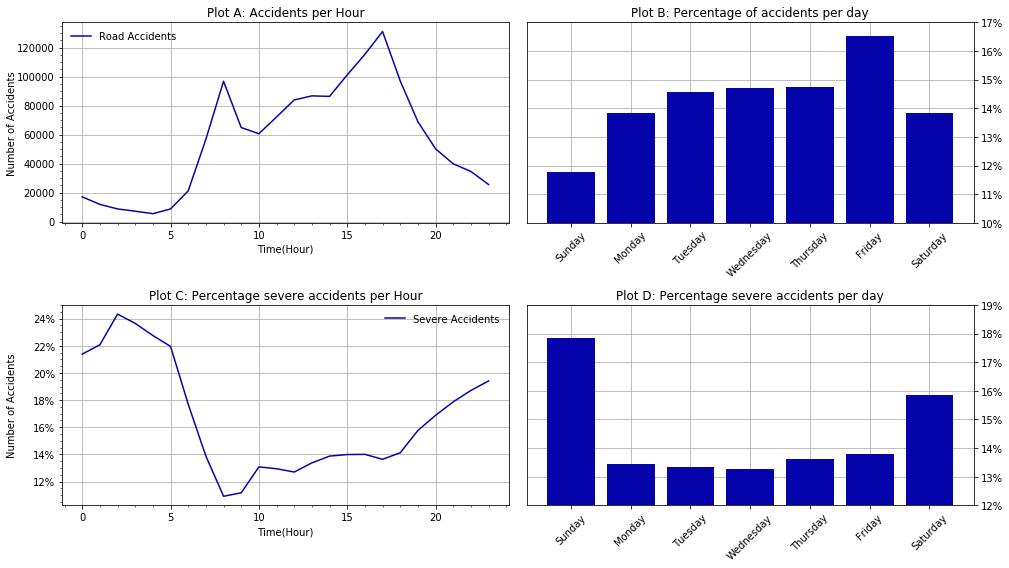

In [15]:
#Create the plot for both figures:
#fig, (ax, ax2, axhour, axday) = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
fig = plt.figure(figsize=(14,8))

#Plot for the hour of day:
ax = fig.add_subplot(221)
ax.plot(hour, number_of_accidents_hour, color='#0504aa')
ax.legend(['Road Accidents'],loc='upper left',frameon=False)
ax.set_title('Plot A: Accidents per Hour')
ax.set_ylabel('Number of Accidents', size = 10)
ax.minorticks_on()
ax.set_xlabel('Time(Hour)')
ax.get_yaxis().set_label_coords(-0.1,0.5)
ax.grid(True)

#Plot fo the day of the week:
ax2 = fig.add_subplot(222)
ax2.bar(x1_, y1, color='#0504aa', zorder=3)
ax2.set_xticklabels(x2, rotation=45)
ax2.set_title("Plot B: Percentage of accidents per day")
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.grid(True, zorder=0)
ax2.set_ylim([0.10, 0.17])
vals10 = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x1_) for x1_ in vals10]) #edit "1" to "2" if more decimals are needed.
ax1 = fig.add_subplot(221)

axhour = fig.add_subplot(223)
axhour.plot(hour, percentage_severe_accidents, color='#0504aa')
axhour.legend(['Severe Accidents'],loc='upper right',frameon=False)
axhour.set_title('Plot C: Percentage severe accidents per Hour')
axhour.set_ylabel('Number of Accidents', size = 10)
axhour.minorticks_on()
axhour.set_xlabel('Time(Hour)')
axhour.grid(True)
axhour.get_yaxis().set_label_coords(-0.1,0.5)
valshour = axhour.get_yticks()
axhour.set_yticklabels(['{:,.0%}'.format(percentage_severe_accidents) for percentage_severe_accidents in valshour]) #edit "1" to "2" if more decimals are needed.



#Plot fo the day of the week:
axday = fig.add_subplot(224)
axday.bar(x1_, percentage_day, color='#0504aa', zorder=3)
axday.set_xticklabels(x2, rotation=45)
axday.set_title("Plot D: Percentage severe accidents per day")
axday.yaxis.set_label_position("right")
axday.yaxis.tick_right()
axday.set_ylim([0.12, 0.19])
axday.grid(True, zorder=0)
valsday = axday.get_yticks()
axday.set_yticklabels(['{:,.0%}'.format(percentage_day) for percentage_day in valsday]) #edit "1" to "2" if more decimals are needed.

fig.tight_layout()

plt.savefig('DayHour.png')

### Plot: Accidents by Speed Limit:

In [16]:
#First plot over speeding: 
#Creating needed variables:
speed_20 = len(joined[joined['Speed_limit']==20.0])
speed_30 = len(joined[joined['Speed_limit']==30.0])
speed_40 = len(joined[joined['Speed_limit']==40.0])
speed_50 = len(joined[joined['Speed_limit']==50.0])
speed_60 = len(joined[joined['Speed_limit']==60.0])
speed_70 = len(joined[joined['Speed_limit']==70.0])
total_accidents_speed = speed_20 + speed_30 + speed_40 + speed_50 + speed_60 + speed_70
#Percentage:
speed_20_pct = speed_20 / total_accidents_speed
speed_30_pct = speed_30 / total_accidents_speed
speed_40_pct = speed_40 / total_accidents_speed
speed_50_pct = speed_50 / total_accidents_speed
speed_60_pct = speed_60 / total_accidents_speed
speed_70_pct = speed_70 / total_accidents_speed
#Defining variabels:
x = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
y = [speed_20_pct, speed_30_pct, speed_40_pct, speed_50_pct, speed_60_pct, speed_70_pct]
x_ = list(range(len(x)))

#Creating second plot, showing the serious and fatal accidents. 
fataldata = joined[joined['Accident_Severity']==1]
speed_20_ = len(fataldata[fataldata['Speed_limit']==20.0])
speed_30_ = len(fataldata[fataldata['Speed_limit']==30.0])
speed_40_ = len(fataldata[fataldata['Speed_limit']==40.0])
speed_50_ = len(fataldata[fataldata['Speed_limit']==50.0])
speed_60_ = len(fataldata[fataldata['Speed_limit']==60.0])
speed_70_ = len(fataldata[fataldata['Speed_limit']==70.0])
total_accidents_ = speed_20_ + speed_30_ + speed_40_ + speed_50_ + speed_60_ + speed_70_

#Percentage relative number of accidents within the speed limit:
speed_20_pct_ = speed_20_ / speed_20
speed_30_pct_ = speed_30_ / speed_30
speed_40_pct_ = speed_40_ / speed_40
speed_50_pct_ = speed_50_ / speed_50
speed_60_pct_ = speed_60_ / speed_60
speed_70_pct_ = speed_70_ / speed_70

x3 = ['20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.']
x33 = ['','20 mph.', '30 mph.', '40 mph.', '50 mph.','60 mph.', '70 mph.'] #Needed for Subplot
y3 = [speed_20_pct_, speed_30_pct_, speed_40_pct_, speed_50_pct_, speed_60_pct_, speed_70_pct_]
x3_ = list(range(len(x3)))

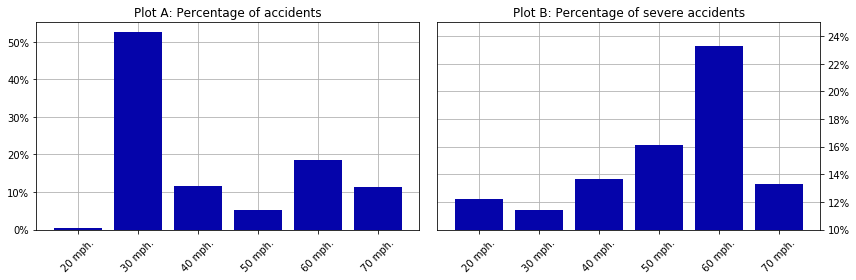

In [17]:
#Collecting the plots in one figure:
fig2, (ax3, ax4) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
#Figure 1:
ax3.bar(x_, y, color='#0504aa', zorder=3)
ax3.set_xticklabels(x33, rotation=45)
ax3.set_title("Plot A: Percentage of accidents")
ax3.grid(True, zorder=0)
vals = ax3.get_yticks()
ax3.set_yticklabels(['{:,.0%}'.format(x_) for x_ in vals]) #edit "1" to "2" if more decimals are needed.

#Figure 2: 
ax4.bar(x3_, y3, color='#0504aa', zorder=3)
ax4.set_xticklabels(x33, rotation=45)
ax4.set_title("Plot B: Percentage of severe accidents")
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.set_ylim([0.10, 0.25])
vals = ax4.get_yticks()
ax4.grid(True, zorder=0)
ax4.set_yticklabels(['{:,.0%}'.format(x3_) for x3_ in vals]) #edit "1" to "2" if more decimals are needed.

fig2.tight_layout()
plt.savefig('Speedlimit.png')

### Plot: Accidents by Gender:

In [18]:
#Loop for all accidents per gender:
gender_1 = []
fatal_accident_per_gender_1 = []
for i in range(1,3):
    gender_1.append(i)
    fatal_accident_per_gender_1.append(len(joined[(joined['Sex_of_Driver'] == i)]))
    
total_1 = sum(fatal_accident_per_gender_1)
percentage_1 = np.array(fatal_accident_per_gender_1) / total_1

#Label for plot
x5 = ['Male', 'Female']

#Loop for fatal and serious accidents per gender relative to total number of accidents:
gender_2 = []
fatal_accident_per_gender_2 = []
for i in range(1,3):
    gender_2.append(i)
    fatal_accident_per_gender_2.append(len(joined[(joined['Sex_of_Driver'] == i) & (joined['Accident_Severity'] == 1)]))

total_2 = sum(fatal_accident_per_gender_2)
fatal_accident_per_gender_3 = np.array(fatal_accident_per_gender_2)
percentage_2 = fatal_accident_per_gender_3 / total_1

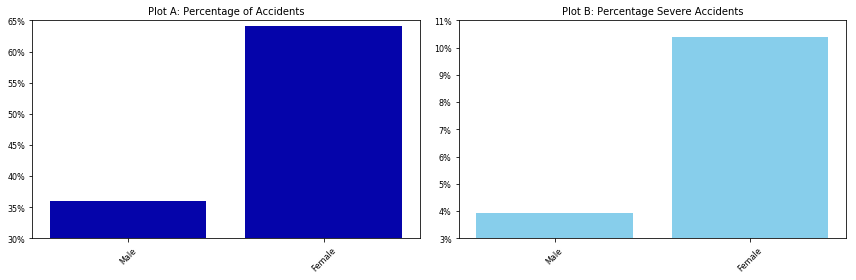

In [19]:
fig4, (ax8, ax9) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax8.bar(x5, percentage_1, color='#0504aa')
ax8.set_xticklabels(x5, rotation=45, size=8)
ax8.set_title("Plot A: Percentage of Accidents", size=10)
ax8.set_ylim([0.30, 0.65])
vals2 = ax8.get_yticks()
ax8.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals2], size=8) #edit "1" to "2" if more decimals are needed.

ax9.bar(x5, percentage_2, color='skyblue')
ax9.set_xticklabels(x5, rotation=45, size=8)
ax9.set_title("Plot B: Percentage Severe Accidents", size=10)
ax9.set_ylim([0.03, 0.11])
vals = ax9.get_yticks()
ax9.set_yticklabels(['{:,.0%}'.format(x5) for x5 in vals], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Gender.png')

### Plot: Accidents by Age:

In [20]:
#We will only consider legal drivers, which is at minumum 17 years old in UK: 
age = []
accident_per_age = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age.append(i)
    accident_per_age.append(len(joined[(joined['Age_of_Driver'] == i) ]))
#print(age)
#print(accident_per_age)

#Age relative to serious and fatal accidents:
age2 = []
accident_per_age2 = []
for i in range(17, max(joined['Age_of_Driver'])): #+1) perhaps?
    age2.append(i)
    accident_per_age2.append(len(joined[(joined['Age_of_Driver'] == i) & (joined['Accident_Severity'] == 1) ]))
#print(age2)
#print(accident_per_age2)

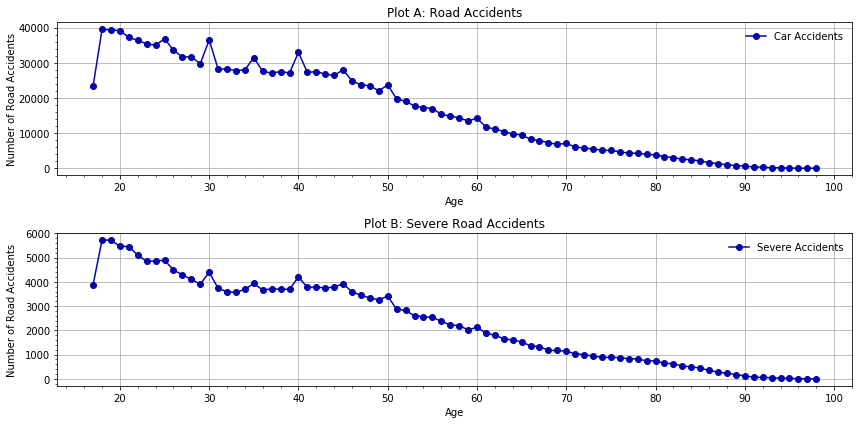

In [21]:
fig3, (ax6, ax7) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

#Figure 1: 
ax6.plot(age, accident_per_age, color='#0504aa', marker = 'o')
ax6.legend(['Car Accidents'],loc='upper right',frameon=False)
ax6.set_title('Plot A: Road Accidents', size=12)
ax6.set_ylabel('Number of Road Accidents', size =10)
ax6.minorticks_on()
ax6.set_xlabel('Age', size =10)
ax6.get_yaxis().set_label_coords(-0.05,0.5)
ax6.grid(True)

#Figure2:
ax7.plot(age2, accident_per_age2, color='#0504aa', marker = 'o')
ax7.legend(['Severe Accidents'],loc='upper right',frameon=False)
ax7.set_title('Plot B: Severe Road Accidents', size=12)
ax7.set_ylabel('Number of Road Accidents', size =10)
ax7.minorticks_on()
ax7.set_xlabel('Age', size =10)
ax7.grid(True)
ax7.get_yaxis().set_label_coords(-0.05,0.5)
fig3.tight_layout()

plt.savefig('AgeCar.png')

### Plot: Accidents by Weather:

In [22]:
#Loop for all accidents per weather condition:
weather = []
accident_per_weather_1 = []
for i in range(1,3):
    weather.append(i)
    accident_per_weather_1.append(len(joined[(joined['Weather_Conditions'] == i)]))
    
total_weather_1 = sum(accident_per_weather_1)
percentage_weather_1 = np.array(accident_per_weather_1) / total_weather_1

#Loop for fatal & serious accident:
weather_2 = []
fatal_accident_per_weather_1 = []
for i in range(1,3):
    weather_2.append(i)
    fatal_accident_per_weather_1.append(len(joined[(joined['Weather_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_weather_2 = sum(fatal_accident_per_weather_1)
percentage_weather_2 = np.array(fatal_accident_per_weather_1) / total_weather_1
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_weather = np.array(fatal_accident_per_weather_1) / np.array(accident_per_weather_1)

#Label for plot
x_weather = ['Dry', 'Rain']

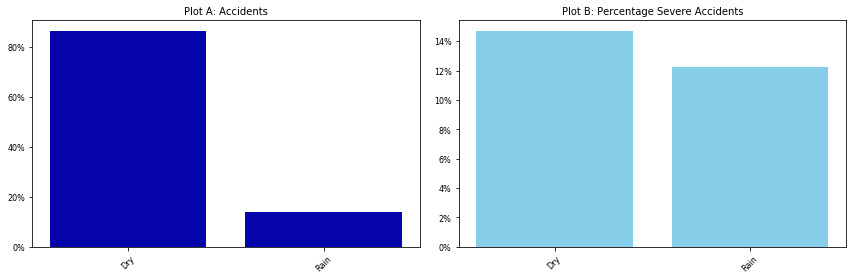

In [23]:
fig4, (ax10, ax11) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax10.bar(x_weather, percentage_weather_1, color='#0504aa')
ax10.set_xticklabels(x_weather, rotation=45, size=8)
ax10.set_title("Plot A: Accidents", size=10)
vals3 = ax11.get_yticks()
ax10.set_yticklabels(['{:,.0%}'.format(x_weather) for x_weather in vals3], size=8) #edit "1" to "2" if more decimals are needed.

ax11.bar(x_weather, percentage_weather, color='skyblue')
ax11.set_xticklabels(x_weather, rotation=45, size=8)
ax11.set_title("Plot B: Percentage Severe Accidents", size=10)
vals4 = ax11.get_yticks()
ax11.set_yticklabels(['{:,.0%}'.format(x_weather) for x_weather in vals4], size=8) #edit "1" to "2" if more decimals are needed.

fig4.tight_layout()
plt.savefig('Weather.png')

### Plot: Road Condtitions: 

In [24]:
#Loop for all accidents per road condtion:
road_con = []
accident_per_road_con_1 = []
for i in range(1,3):
    road_con.append(i)
    accident_per_road_con_1.append(len(joined[(joined['Road_Surface_Conditions'] == i)]))
    
total_road_1 = sum(accident_per_road_con_1)
percentage_road_1 = np.array(accident_per_road_con_1) / total_road_1

#Loop for fatal & serious accident:
road_2 = []
fatal_accident_per_road_con = []
for i in range(1,3):
    road_2.append(i)
    fatal_accident_per_road_con.append(len(joined[(joined['Road_Surface_Conditions'] == i) & (joined['Accident_Severity'] == 1) ]))
    
total_road_2 = sum(fatal_accident_per_road_con)
percentage_road_2 = np.array(fatal_accident_per_road_con) / total_road_2
#Calculate percentage of fatal & serious accidents relative to number of accidents in the specific condition: 
percentage_road = np.array(fatal_accident_per_road_con) / np.array(accident_per_road_con_1)

#Label for plot
x_road = ['Dry Road', 'Wet Road']

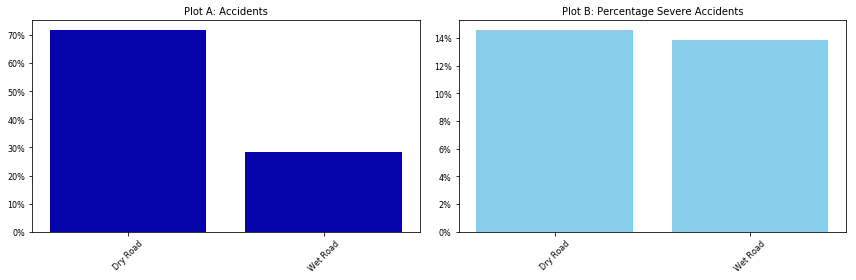

In [25]:
fig5, (ax12, ax13) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax12.bar(x_road, percentage_road_1, color='#0504aa')
ax12.set_xticklabels(x_road, rotation=45, size=8)
ax12.set_title("Plot A: Accidents", size=10)
vals5 = ax12.get_yticks()
ax12.set_yticklabels(['{:,.0%}'.format(x_road) for x_road in vals5], size=8) #edit "1" to "2" if more decimals are needed.

ax13.bar(x_road, percentage_road, color='skyblue')
ax13.set_xticklabels(x_road, rotation=45, size=8)
ax13.set_title("Plot B: Percentage Severe Accidents", size=10)
vals6 = ax13.get_yticks()
ax13.set_yticklabels(['{:,.0%}'.format(x_road) for x_road in vals6], size=8) #edit "1" to "2" if more decimals are needed.

fig5.tight_layout()
plt.savefig('Road.png')

### Vehicle Age

In [26]:
vehicle_age = []
accident_per_vehicle_age = []
for i in range(1, 20): 
    vehicle_age.append(i)
    accident_per_vehicle_age.append(len(joined[(joined['Age_of_Vehicle'] == i)]))
#print(vehicle_age)
#print(accident_per_vehicle_age)


vehicle_age_2 = []
accident_per_vehicle_age_2 = []
for i in range(1, 20): 
    vehicle_age_2.append(i)
    accident_per_vehicle_age_2.append(len(joined[(joined['Age_of_Vehicle'] == i) & (joined['Accident_Severity'] == 1)]))
#print(vehicle_age_2)
#print(accident_per_vehicle_age_2)

normalized_vehicle = list(np.array(accident_per_vehicle_age_2) / np.array(accident_per_vehicle_age))
print(normalized_vehicle)

[0.14554991877592138, 0.14268794048551292, 0.14296006484084975, 0.13981614926187044, 0.1381184316699235, 0.13931303232278414, 0.13844628226481942, 0.1364343331884268, 0.13805270922212032, 0.13829322595421473, 0.13828005359877488, 0.14240311520235932, 0.14424090060446976, 0.15353747060627748, 0.1608898859599925, 0.17048317563406304, 0.18172278093572367, 0.18799562482909488, 0.20357894736842105]


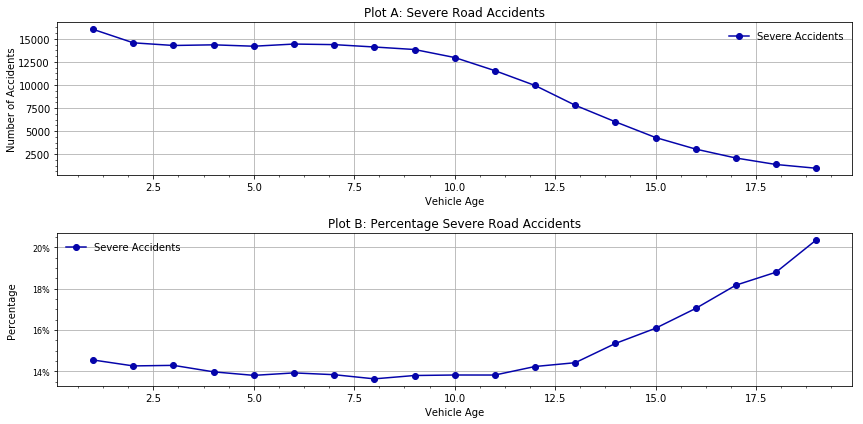

In [27]:
fig7, (ax_v, ax_v2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
accident_per_vehicle_age_2

#Figure 1: 
ax_v.plot(vehicle_age, accident_per_vehicle_age_2, color='#0504aa', marker = 'o')
ax_v.legend(['Severe Accidents'],loc='upper right',frameon=False)
ax_v.set_title('Plot A: Severe Road Accidents', size=12)
ax_v.set_ylabel('Number of Accidents', size =10)
ax_v.minorticks_on()
ax_v.set_xlabel('Vehicle Age', size =10)
ax_v.get_yaxis().set_label_coords(-0.05,0.5)
ax_v.grid(True)

#Figure2:
ax_v2.plot(vehicle_age_2, normalized_vehicle, color='#0504aa', marker = 'o')
ax_v2.legend(['Severe Accidents'],loc='upper left',frameon=False)
ax_v2.set_title('Plot B: Percentage Severe Road Accidents', size=12)
ax_v2.set_ylabel('Percentage', size =10)
ax_v2.minorticks_on()
ax_v2.set_xlabel('Vehicle Age', size =10)
ax_v2.grid(True)
ax_v2.get_yaxis().set_label_coords(-0.05,0.5)
valsvehicle = ax_v2.get_yticks()
ax_v2.set_yticklabels(['{:,.0%}'.format(vehicle_age_2) for vehicle_age_2 in valsvehicle], size=8) #edit "1" to "2" if more decimals are needed.


fig7.tight_layout()

plt.savefig('AgeVehicle.png')

# Machine Learning

## Unsupervised Learning
- **Clustering**

In [10]:
# Changing the 'joined' dataset to array
joined_cl = joined_master.copy()
joined_cl = joined_cl.dropna()
joined_X = joined_cl.drop(['Accident_Index','Time', 'Accident_Severity'], axis=1)
joined_y = joined_cl['Accident_Severity']

X = joined_X.values
y = joined_y.values


# KMeans
clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))
print(X)

0.638239780331308
[[ 1.  2. 36. ...  1.  1.  1.]
 [ 1.  1. 24. ...  1.  1.  1.]
 [ 1.  1. 20. ...  1.  1.  1.]
 ...
 [ 1.  1. 67. ...  1.  2.  3.]
 [ 1.  1. 27. ...  2.  2.  2.]
 [ 2.  1. 79. ...  1.  2.  2.]]


In [29]:
# Clustering - Scaled

# Changing the 'joined' dataset to array
joined_cl = joined_master.copy()
joined_cl = joined_cl.dropna()
joined_X = joined_cl.drop(['Accident_Index','Time', 'Accident_Severity'], axis=1)
joined_y = joined_cl['Accident_Severity']

X = joined_X.values
X = preprocessing.scale(X) # The scaling process of an array
y = joined_y.values


# KMeans
clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i])
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1
        
print(correct/len(X))
print(X)

0.34932470518266023
[[-0.75109046  1.33539583 -0.20877322 ... -0.39974786 -0.62928851
  -0.53817925]
 [-0.75109046 -0.74884164 -0.94754326 ... -0.39974786 -0.62928851
  -0.53817925]
 [-0.75109046 -0.74884164 -1.19379995 ... -0.39974786 -0.62928851
  -0.53817925]
 ...
 [-0.75109046 -0.74884164  1.69971608 ... -0.39974786  1.58909624
   1.50572728]
 [-0.75109046 -0.74884164 -0.76285075 ...  2.50157687  1.58909624
   0.48377401]
 [ 0.58790548 -0.74884164  2.43848613 ... -0.39974786  1.58909624
   0.48377401]]


## Supervised Learning - Logistic regression


In [30]:
# Logistic Regression
# Changing the 'joined' dataset to array

joined_lr = joined_master.copy()
joined_lr = joined_lr.dropna()

joined_x = joined_lr.drop(['Accident_Index','Vehicle_Reference','Time', 'Accident_Severity'], axis=1)
joined_y = joined_lr['Accident_Severity']

X = joined_x.values
X = preprocessing.scale(X)
y = joined_y.values

print('done')

done


In [31]:
print(X.shape)
print(y.shape)

(1351854, 11)
(1351854,)


In [32]:
# Logistic Regression
logisticRegr = LogisticRegression()

# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

#Getting the optimal values of penalty and C
clf = GridSearchCV(logisticRegr, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(x_train, y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 7.742636826811269


In [33]:
clf = LogisticRegression(penalty = 'l1', C = 7.742636826811269)
clf.fit(x_train, y_train)

score_lr = clf.score(x_test, y_test)

print(score_lr)
print(X)

0.856386224853997
[[ 1.33539583 -0.20877322 -1.38606935 ... -0.39974786 -0.62928851
  -0.53817925]
 [-0.74884164 -0.94754326 -0.52169893 ... -0.39974786 -0.62928851
  -0.53817925]
 [-0.74884164 -1.19379995  0.7748567  ... -0.39974786 -0.62928851
  -0.53817925]
 ...
 [-0.74884164  1.69971608  0.34267149 ... -0.39974786  1.58909624
   1.50572728]
 [-0.74884164 -0.76285075  0.9909493  ...  2.50157687  1.58909624
   0.48377401]
 [-0.74884164  2.43848613  0.7748567  ... -0.39974786  1.58909624
   0.48377401]]


## Supervised Learning - Random Forest

In [34]:
joined = joined_master.copy()

joined.drop(['Accident_Index','Time','Vehicle_Reference'], axis=1, inplace=True)
joined.describe()

,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Vehicle_Type,Day_of_Week,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Number_of_Casualties,Accident_Severity
count,1.351945e+06,1.351945e+06,1.351945e+06,1.351945e+06,1.351945e+06,1.351945e+06,1.351932e+06,1.351945e+06,1.351945e+06,1.351945e+06,1.351945e+06,1.351945e+06
mean,1.359295e+00,3.939122e+01,7.414228e+00,8.479863e+00,4.117909e+00,3.266458e+00,4.229499e+01,1.855993e+00,1.137777e+00,1.283673e+00,1.526605e+00,1.434289e-01
std,4.797940e-01,1.624320e+01,4.627599e+00,1.819055e+00,1.949111e+00,8.961065e-01,1.521856e+01,1.547540e+00,3.446660e-01,4.507801e-01,9.784977e-01,3.505098e-01
min,1.000000e+00,9.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.600000e+01,4.000000e+00,9.000000e+00,2.000000e+00,3.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,3.700000e+01,7.000000e+00,9.000000e+00,4.000000e+00,3.000000e+00,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.000000e+00,5.000000e+01,1.000000e+01,9.000000e+00,6.000000e+00,4.000000e+00,6.000000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
max,2.000000e+00,9.900000e+01,1.110000e+02,9.700000e+01,7.000000e+00,5.000000e+00,7.000000e+01,6.000000e+00,2.000000e+00,2.000000e+00,9.300000e+01,1.000000e+00


In [35]:
joined_master.head()

,Accident_Index,Vehicle_Reference,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Vehicle_Type,Day_of_Week,Time,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Number_of_Casualties,Accident_Severity
0,2016010000006,1,2,36,1,9,3,00:37,3,30.0,4,1,1,1,0
1,2016010000008,1,1,24,5,9,3,01:25,3,30.0,4,1,1,1,0
2,2016010000018,1,1,20,11,9,3,07:53,3,40.0,1,1,1,1,0
3,2016010000019,1,2,30,10,9,3,09:29,3,30.0,1,1,1,1,0
4,2016010000019,2,1,27,5,9,3,09:29,3,30.0,1,1,1,1,0


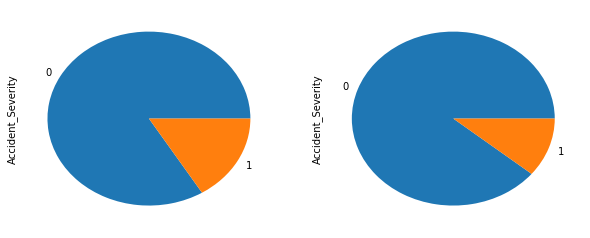

In [36]:
#Scaling and Transformation of all the features
fig= plt.figure(figsize=(10,4))
fig.add_subplot(121)
joined.Accident_Severity[joined['Sex_of_Driver'] == 1].value_counts().plot(kind='pie')
fig.add_subplot(122)
joined.Accident_Severity[joined['Sex_of_Driver'] == 2].value_counts().plot(kind='pie')

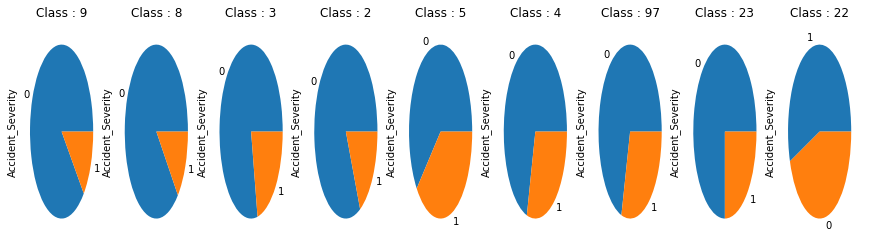

In [37]:
joined['Age_of_Vehicle'] = StandardScaler().fit_transform(joined['Age_of_Vehicle'].values.reshape(-1, 1))
joined['Age_of_Driver'] = StandardScaler().fit_transform(joined['Age_of_Driver'].values.reshape(-1, 1))

fig = plt.figure(figsize=(15,4))

i=1
for typ in joined['Vehicle_Type'].unique():
    fig.add_subplot(1, 9, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined['Vehicle_Type'] == typ].value_counts().plot(kind='pie')
    i += 1   

In [38]:
replacement = {
   22: 0,
    5: 1,
    4: 2,
   97: 3,
   23: 4,
    3: 5,
    2: 6,
    8: 7,
    9: 8
}
joined['Vehicle_Type'] = joined['Vehicle_Type'].apply(lambda x: replacement.get(x))
joined['Vehicle_Type'] = StandardScaler().fit_transform(joined['Vehicle_Type'].values.reshape(-1, 1))

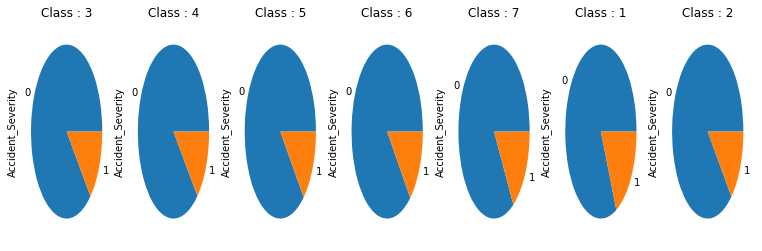

In [39]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined['Day_of_Week'].unique():
    fig.add_subplot(1, 8, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined['Day_of_Week'] == typ].value_counts().plot(kind='pie')
    i += 1 

In [40]:
replacement = {
    1: 0,
    7: 1,
    6: 2,
    5: 3,
    4: 4,
    3: 5,
    2: 6,
}
joined['Day_of_Week'] = joined['Day_of_Week'].apply(lambda x: replacement.get(x))
joined['Day_of_Week'] = StandardScaler().fit_transform(joined['Day_of_Week'].values.reshape(-1, 1))

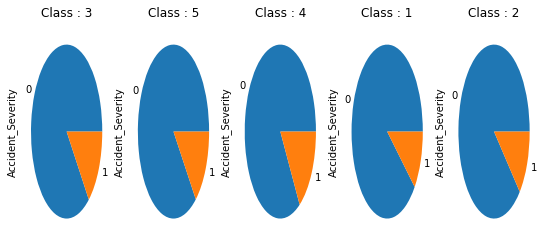

In [41]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined["1st_Road_Class"].unique():
    fig.add_subplot(1, 8, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined["1st_Road_Class"] == typ].value_counts().plot(kind='pie')
    i += 1 

In [42]:
replacement = {
    4: 0,
    5: 1,
    3: 2,
    2: 3,
    1: 4,
}
joined["1st_Road_Class"] = joined["1st_Road_Class"].apply(lambda x: replacement.get(x))
joined["1st_Road_Class"] = StandardScaler().fit_transform(joined["1st_Road_Class"].values.reshape(-1, 1))

In [43]:
#Removing nan values from our feature Speed_limit
joined = joined[(joined["Speed_limit"]>=20.0) & (joined["Speed_limit"]<=70.0)]
joined["Speed_limit"].unique()

array([30., 40., 20., 70., 50., 60.])

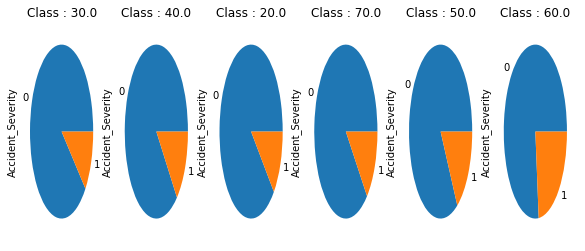

In [44]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined["Speed_limit"].unique():
    fig.add_subplot(1, 9, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined["Speed_limit"] == typ].value_counts().plot(kind='pie')
    i += 1 

In [45]:
replacement = {
 60.0: 0,
 50.0: 1,
 40.0: 2,
 70.0: 3,
 30.0: 4,
 20.0: 5
}
joined["Speed_limit"] = joined["Speed_limit"].apply(lambda x: replacement.get(x))
joined["Speed_limit"] = StandardScaler().fit_transform(joined["Speed_limit"].values.reshape(-1, 1))

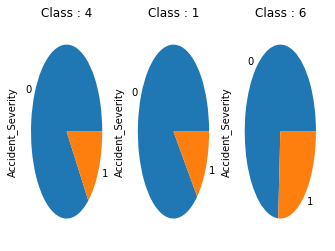

In [46]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined["Light_Conditions"].unique():
    fig.add_subplot(1, 8, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined["Light_Conditions"] == typ].value_counts().plot(kind='pie')
    i += 1 

In [47]:
replacement = {
    6: 0,
    4: 1,
    1: 2,
}
joined["Light_Conditions"] = joined["Light_Conditions"].apply(lambda x: replacement.get(x))
joined["Light_Conditions"] = StandardScaler().fit_transform(joined["Light_Conditions"].values.reshape(-1, 1))

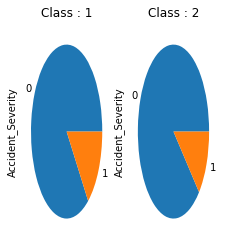

In [48]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined["Weather_Conditions"].unique():
    fig.add_subplot(1, 8, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined["Weather_Conditions"] == typ].value_counts().plot(kind='pie')
    i += 1 

In [49]:
replacement = {
    1: 0,
    2: 1,
}
joined["Weather_Conditions"] = joined["Weather_Conditions"].apply(lambda x: replacement.get(x))
joined["Weather_Conditions"] = StandardScaler().fit_transform(joined["Weather_Conditions"].values.reshape(-1, 1))

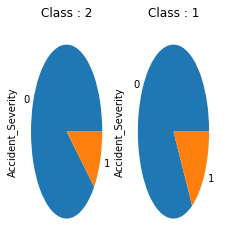

In [50]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined["Sex_of_Driver"].unique():
    fig.add_subplot(1, 8, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined["Sex_of_Driver"] == typ].value_counts().plot(kind='pie')
    i += 1 

In [51]:
replacement = {
    1: 0,
    2: 1,
}
joined["Sex_of_Driver"] = joined["Sex_of_Driver"].apply(lambda x: replacement.get(x))
joined["Sex_of_Driver"] = StandardScaler().fit_transform(joined["Sex_of_Driver"].values.reshape(-1, 1))

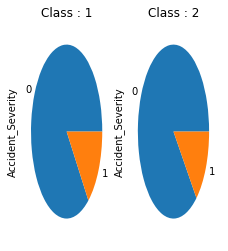

In [52]:
fig = plt.figure(figsize=(15,4))

i=1
for typ in joined["Road_Surface_Conditions"].unique():
    fig.add_subplot(1, 8, i)
    plt.title('Class : {}'.format(typ))
    joined.Accident_Severity[joined["Road_Surface_Conditions"] == typ].value_counts().plot(kind='pie')
    i += 1 

In [53]:
replacement = {
    2: 0,
    1: 1,
}
joined["Road_Surface_Conditions"] = joined["Road_Surface_Conditions"].apply(lambda x: replacement.get(x))
joined["Road_Surface_Conditions"] = StandardScaler().fit_transform(joined["Road_Surface_Conditions"].values.reshape(-1, 1))

In [54]:
#Splitting the target Accident_Severity from our data and then splitting the data 80:20
fatal = joined['Accident_Severity']
joined.drop('Accident_Severity', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(joined, fatal, test_size=0.2, random_state=42)

In [55]:
X_train.head()

,Sex_of_Driver,Age_of_Driver,Age_of_Vehicle,Vehicle_Type,Day_of_Week,1st_Road_Class,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Number_of_Casualties
918590,1.335381,-0.331906,-0.521702,0.318829,-0.029901,0.336491,0.788003,0.534460,-0.399744,0.629292,1
11310,-0.748850,0.160608,-0.521702,0.318829,-1.579183,-0.688599,0.788003,-1.223704,-0.399744,0.629292,1
148769,-0.748850,-0.455035,0.126582,0.318829,-0.546328,0.336491,0.788003,-1.223704,-0.399744,0.629292,1
52704,-0.748850,1.515021,-0.521702,0.318829,-0.546328,2.386671,0.153343,0.534460,-0.399744,0.629292,3
27632,-0.748850,-0.208778,1.207057,0.318829,1.002953,0.336491,0.788003,0.534460,2.501604,-1.589086,1


In [56]:
#Running RandomForest Classifier 
model = RandomForestClassifier(n_estimators = 100,warm_start=True, oob_score=True)

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("The accuracy is:",score)

The accuracy is: 0.8296287529679791


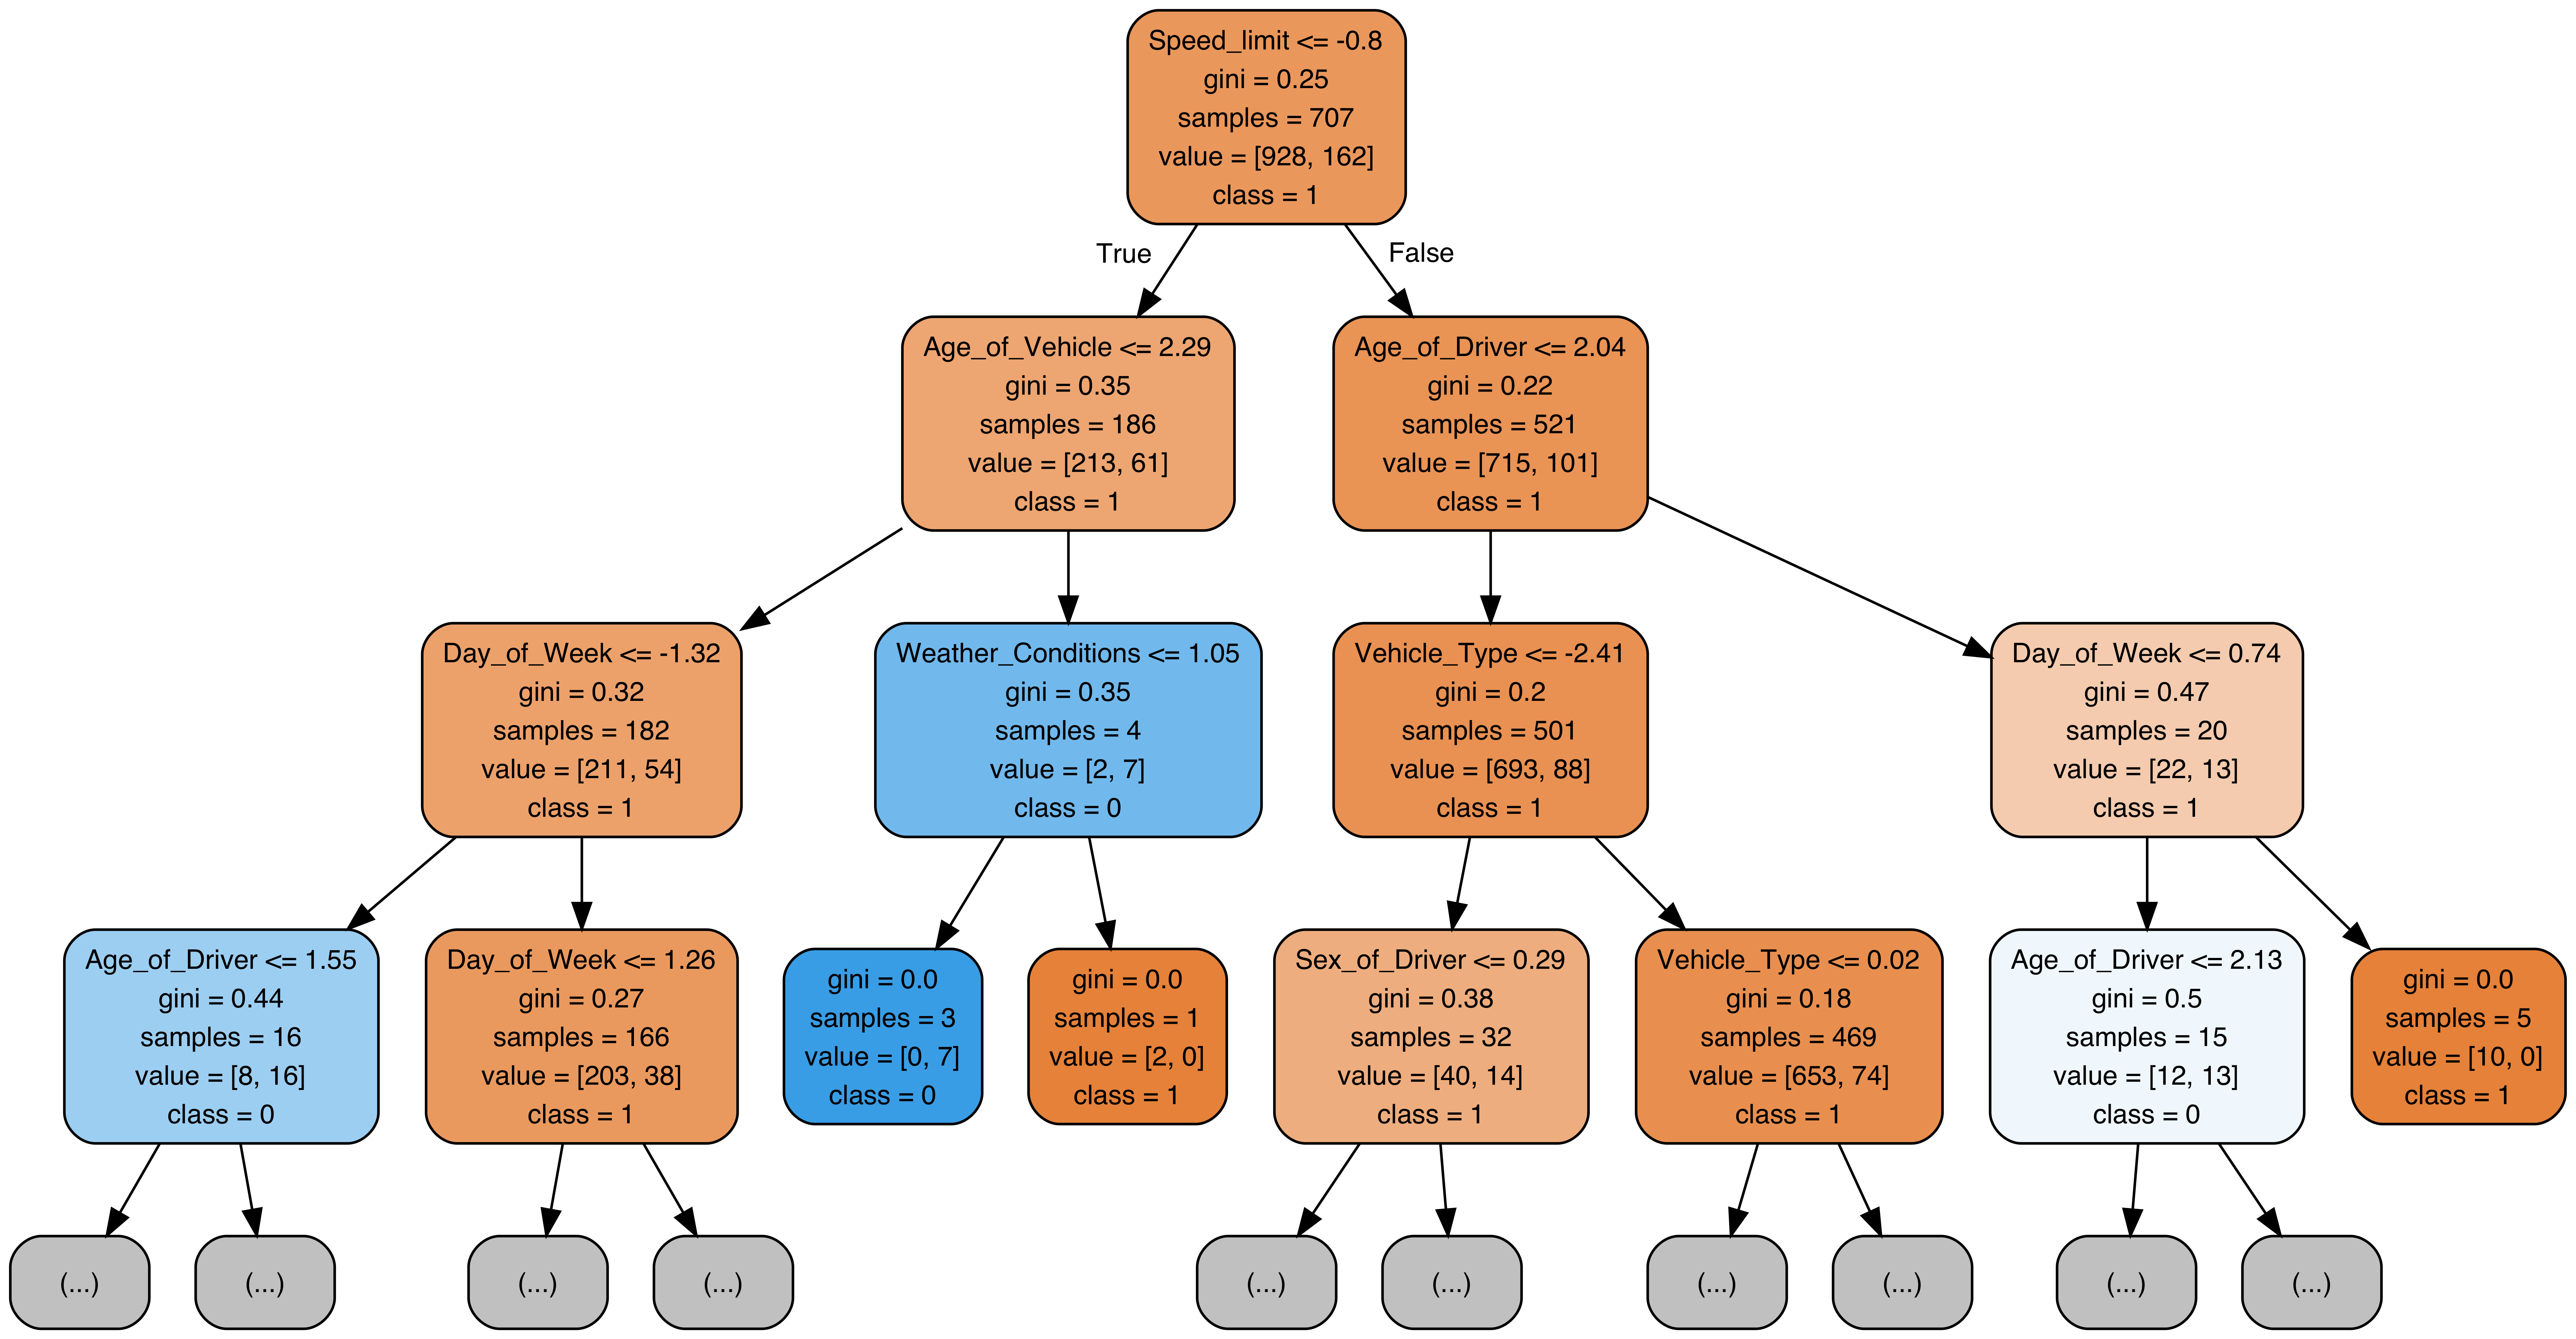

In [58]:
#Code to generate a Graph of Decision Tree from Random Forest
from sklearn.ensemble import RandomForestClassifier
import pydot
from sklearn.tree import export_graphviz

X_train = X_train.sample(n=1090, random_state=15) #Scaling down the number of samples due to performance issues
y_train = y_train.sample(n=1090, random_state=15) #Scaling down the number of samples due to performance issues


y = ['Sex_of_Driver', 'Age_of_Driver', 'Age_of_Vehicle', 'Vehicle_Type',
       'Day_of_Week', '1st_Road_Class', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions','Number_of_Casualties']
y1 = ['1','0']


model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

# Extract single tree
estimator = model.estimators_[5]


# Export as dot file
export_graphviz(estimator, out_file='tree.dot', feature_names = y, class_names =y1, max_depth = 3, rounded = True, 
                proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [244]:
feat_labels = ['Sex_of_Driver', 'Age_of_Driver', 'Age_of_Vehicle', 'Vehicle_Type',
       'Day_of_Week', '1st_Road_Class', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Number_of_Casualties']

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('Sex_of_Driver', 0.008498765784399055)
('Age_of_Driver', 0.41870373977557185)
('Age_of_Vehicle', 0.269843508960099)
('Vehicle_Type', 0.04508263995276321)
('Day_of_Week', 0.10018220470208145)
('1st_Road_Class', 0.03539699105737906)
('Speed_limit', 0.044804858635419754)
('Light_Conditions', 0.017015294121253154)
('Weather_Conditions', 0.00798028395230674)
('Road_Surface_Conditions', 0.014115622977772215)
('Number_of_Casualties', 0.03837609008095446)


In [245]:
#Dropping features with lowest gini importance
X_train = X_train.drop(['Sex_of_Driver','Weather_Conditions','Road_Surface_Conditions','Light_Conditions'], axis=1)
X_test = X_test.drop(['Sex_of_Driver','Weather_Conditions','Road_Surface_Conditions','Light_Conditions'], axis=1)

model = RandomForestClassifier(n_estimators=100,warm_start=True)

model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("The new accuracy is:",score)

0.8357681240892649


LR: 0.856519 (0.003820)
RFC: 0.828854 (0.002847)


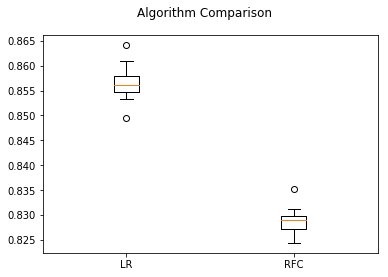

<Figure size 432x288 with 0 Axes>

In [45]:

# Changing the 'joined' dataset to array
joined_cv = joined
joined_cv = joined_cv.dropna()
joined_X = joined_cv.drop(['Accident_Index','Vehicle_Reference','Time', 'Accident_Severity', 'Number_of_Casualties'], axis=1)
joined_y = joined_cv['Accident_Severity']

X = joined_X.values
X = preprocessing.scale(X)
y = joined_y.values

# Configuration for cross validation test
seed = 7
# Preparation of models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RFC', RandomForestClassifier()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
plt.savefig('CrossVal2.png')